In [225]:
import pandas as pd

In [226]:
df=pd.read_csv("./data.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Feature selection
- perimeter_worst
- area_worst
- perimeter_mean

In [227]:
df=df[[ 'perimeter_worst','area_worst','perimeter_mean','diagnosis']]
df.head()

,perimeter_worst,area_worst,perimeter_mean,diagnosis
0,184.60,2019.0,122.80,M
1,158.80,1956.0,132.90,M
2,152.50,1709.0,130.00,M
3,98.87,567.7,77.58,M
4,152.20,1575.0,135.10,M


# Cleaning 
There was not any NaN values

In [228]:
df=df.dropna()


# Scaling and Spliting data 

`When the scaler was applied the accuracy significantly drops by half`

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale=StandardScaler()
min_max_scaler=MinMaxScaler()
#Dependendt
y=df["diagnosis"]
#Independent variable
x=df.drop(columns=["diagnosis"])
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)
# x_train=min_max_scaler.fit_transform(x_train)

In [230]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Model evaluation
1. Accuracy score
2. Confusion Matrix

Score: 0.9415204678362573


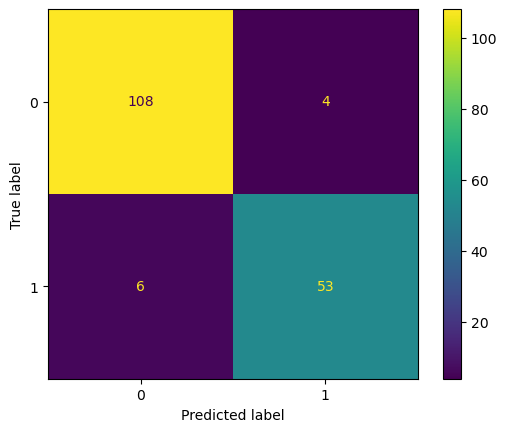

In [231]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm, ConfusionMatrixDisplay
y_predict=model.predict(x_test)
print(f"Score: {accuracy_score(y_test,y_predict)}")
cmatrix=cm(y_test,y_predict)
ConfusionMatrixDisplay(cmatrix).plot()